In [1]:
import sys
from pathlib import Path

# Go two levels up to reach project root
project_root = Path.cwd().parents[1]  # from subfolder/ to notebook_folder/ to project_root/
scripts_path = project_root / "scripts"

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
from scripts.general_scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.general_scripts.pipelines import price_model
from scripts.general_scripts.predict import future_price_prediction
from scripts.general_scripts.lstm import LSTMModelMultiStep, LSTMModelMultiOutput
from scripts.general_scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
scaler = StandardScaler()
model_type = LSTMModelMultiOutput
criterion = CustomizedLoss()
n_lags = 5
n_forecast = 2
seasonal_periods = 261

Seasonality Strength: 0.17


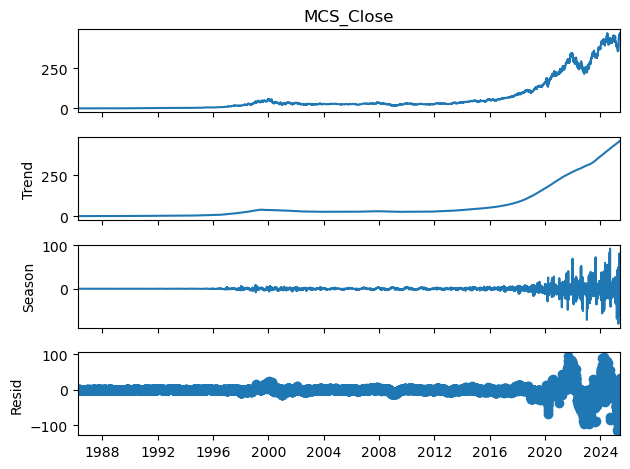

<Figure size 1200x400 with 0 Axes>

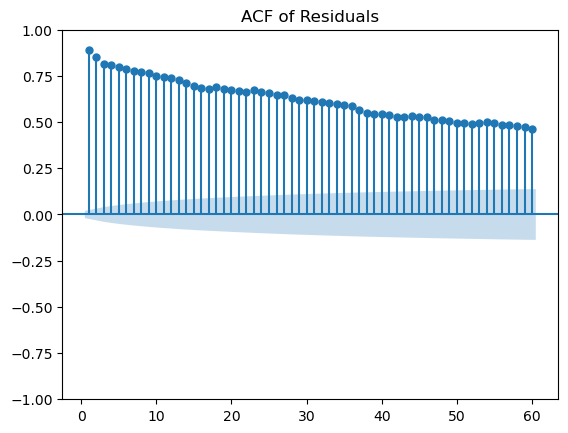

In [5]:
# 📂 Load dataset
file_path_1 = "../../ready_data/microsoft_data/cleaned_microsoft_data.csv"
df_1 = pd.read_csv(file_path_1)
df_1 = quicky_data(df_1, seasonal_periods, 'stl')

In [6]:
df_1

,MCS_Close,trend,seasonal,residual,dow_sin,dow_cos,month_sin,month_cos
Date,,,,,,,,
1986-03-13,0.097222,0.007874,0.063471,0.025877,0.433884,-0.900969,0.866025,0.500000
1986-03-14,0.100694,0.008912,0.063800,0.027982,-0.433884,-0.900969,0.866025,0.500000
1986-03-17,0.102431,0.009950,0.067625,0.024855,0.000000,1.000000,0.866025,0.500000
1986-03-18,0.099826,0.010989,0.072555,0.016283,0.781831,0.623490,0.866025,0.500000
1986-03-19,0.098090,0.012027,0.064488,0.021575,0.974928,-0.222521,0.866025,0.500000
...,...,...,...,...,...,...,...,...
2025-05-30,460.359985,462.278422,-1.442734,-0.475702,-0.433884,-0.900969,0.866025,-0.500000
2025-06-02,461.970001,462.544843,-2.269251,1.694409,0.000000,1.000000,0.500000,-0.866025
2025-06-03,462.970001,462.811255,-0.316147,0.474893,0.781831,0.623490,0.500000,-0.866025


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

9884    464.310354
dtype: float64
Hello
9884   -18.752644
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

9884    463.344059
dtype: float64
[DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-05 00:00:00
(9880, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.3403 - Val Loss: 0.0168
Test Loss: 1.9910
9884    443.271418
dtype: float64
Date
2025-06-05    467.679995
dtype: float64
(1,)
1 1 1
RMSE: 24.4086, MAE: 24.4086, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


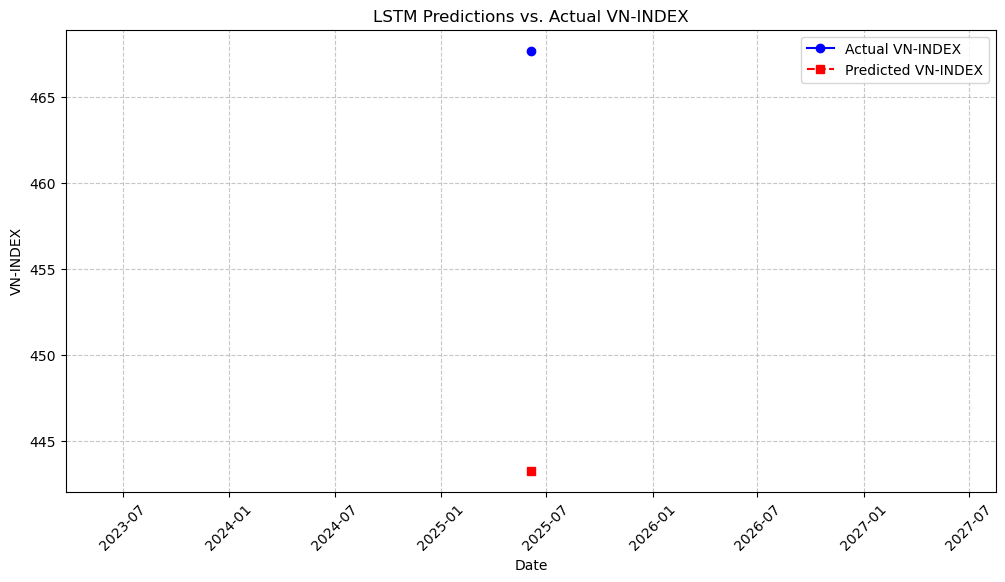

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-05       467.679995          443.271418


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

9883    463.190004
dtype: float64
Hello
9883    1.938395
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


9883    463.077667
dtype: float64
[DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-04 00:00:00
(9879, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.4020 - Val Loss: 0.1576
Test Loss: 0.0307
9883    462.478529
dtype: float64
Date
2025-06-04    463.869995
dtype: float64
(1,)
1 1 1
RMSE: 1.3915, MAE: 1.3915, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


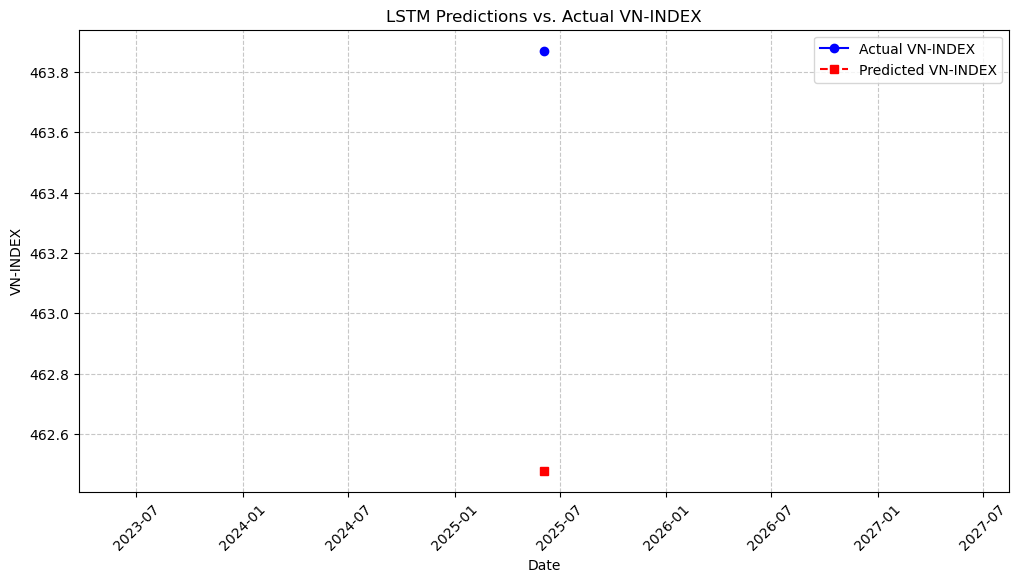

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-04       463.869995          462.478529


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

9882    462.601003
dtype: float64
Hello
9882    1.218775
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


9882    462.811264
dtype: float64
[DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-03 00:00:00
(9878, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.3865 - Val Loss: 0.0495
Test Loss: 0.1655
9882    456.611557
dtype: float64
Date
2025-06-03    462.970001
dtype: float64
(1,)
1 1 1
RMSE: 6.3584, MAE: 6.3584, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


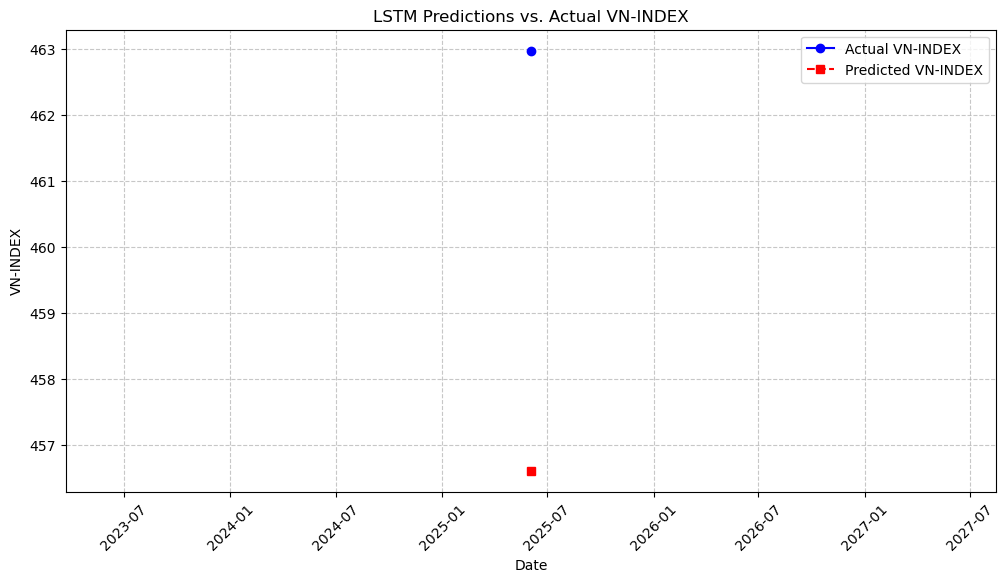

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-03       462.970001          456.611557


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

9881    460.654218
dtype: float64
Hello
9881   -1.567733
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

9881    462.544853
dtype: float64
[DatetimeIndex(['2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-02 00:00:00
(9877, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.3427 - Val Loss: 0.0017
Test Loss: 0.0814
9881    457.138251
dtype: float64
Date
2025-06-02    461.970001
dtype: float64
(1,)
1 1 1
RMSE: 4.8317, MAE: 4.8317, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


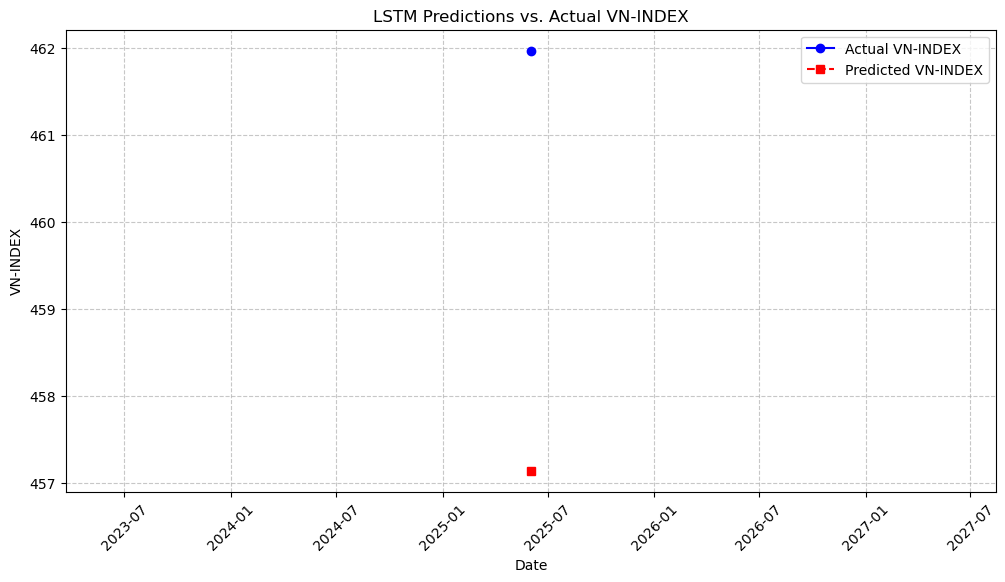

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-02       461.970001          457.138251


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

9880    458.590511
dtype: float64
Hello
9880   -2.660925
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

9880    462.278431
dtype: float64
[DatetimeIndex(['2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-30 00:00:00
(9876, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.2987 - Val Loss: 0.0066
Test Loss: 0.0019
9880    458.295417
dtype: float64
Date
2025-05-30    460.359985
dtype: float64
(1,)
1 1 1
RMSE: 2.0646, MAE: 2.0646, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


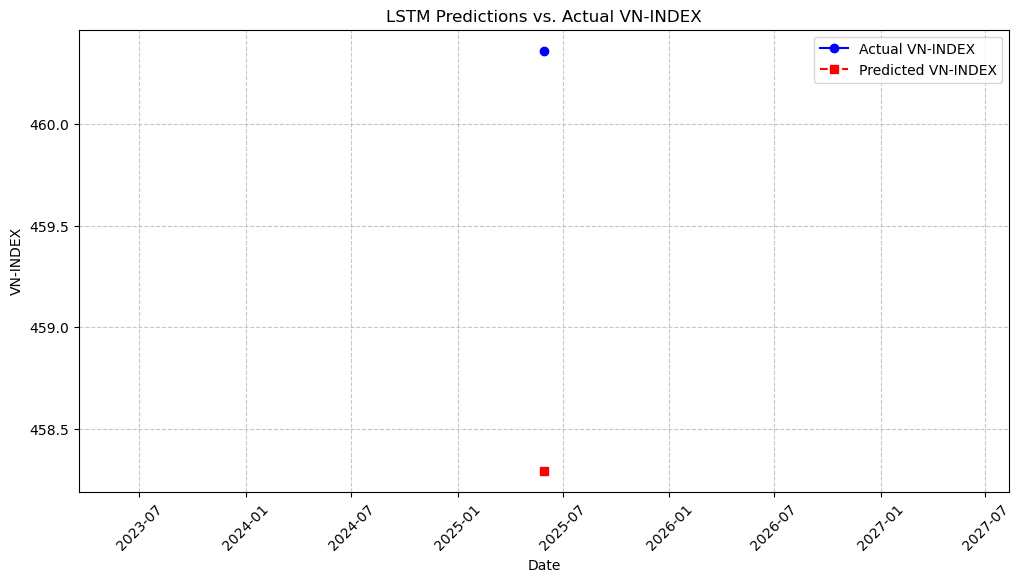

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-30       460.359985          458.295417


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

9883    463.190004
9884    463.731513
dtype: float64
Hello
9883     1.938395
9884   -18.742603
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


9883    463.077667
9884    463.344078
dtype: float64
[DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04', '2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-05 00:00

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.7969 - Val Loss: 0.2499
Test Loss: 1.1738
9883    463.086747
9884    441.415731
dtype: float64
Date
2025-06-04    463.869995
2025-06-05    467.679991
dtype: float64
(2,)
2 2 2
RMSE: 18.5799, MAE: 13.5238, R²: -94.1256, Directional Accuracy: 0.0000


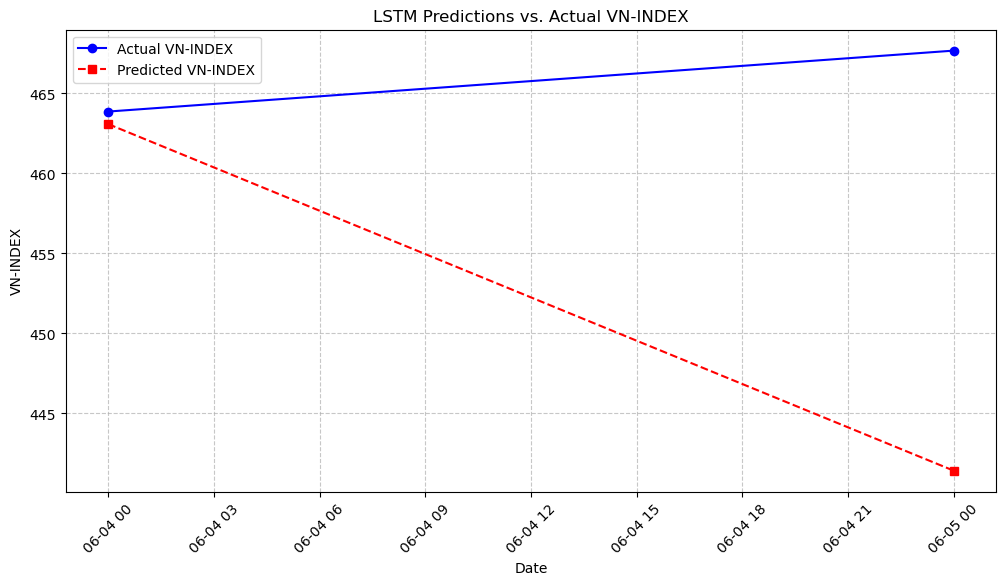

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-04       463.869995          463.086747
1 2025-06-05       467.679991          441.415731


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

9881    460.654218
9882    461.381769
dtype: float64
Hello
9881   -1.567733
9882    1.222282
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


9881    462.544853
9882    462.811284
dtype: float64
[DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-03 00:00

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.7988 - Val Loss: 0.1452
Test Loss: 0.0776
9881    457.238303
9882    459.134564
dtype: float64
Date
2025-06-02    461.970001
2025-06-03    462.970001
dtype: float64
(2,)
2 2 2
RMSE: 4.3069, MAE: 4.2836, R²: -73.1991, Directional Accuracy: 1.0000


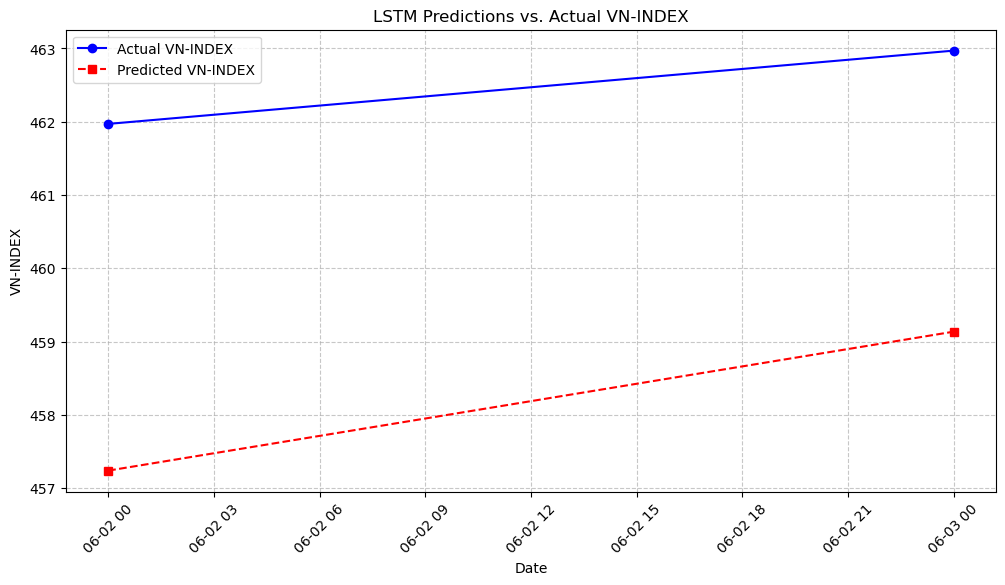

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-02       461.970001          457.238303
1 2025-06-03       462.970001          459.134564


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

9879    458.060957
9880    457.981086
dtype: float64
Hello
9879   -0.529236
9880   -2.646209
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


9879    462.012000
9880    462.278451
dtype: float64
[DatetimeIndex(['2025-05-15', '2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16', '2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-30 00:00

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.7906 - Val Loss: 0.0924
Test Loss: 0.1085
9879    463.185671
9880    460.122667
dtype: float64
Date
2025-05-29    458.679993
2025-05-30    460.359985
dtype: float64
(2,)
2 2 2
RMSE: 3.1904, MAE: 2.3715, R²: -13.4258, Directional Accuracy: 0.0000


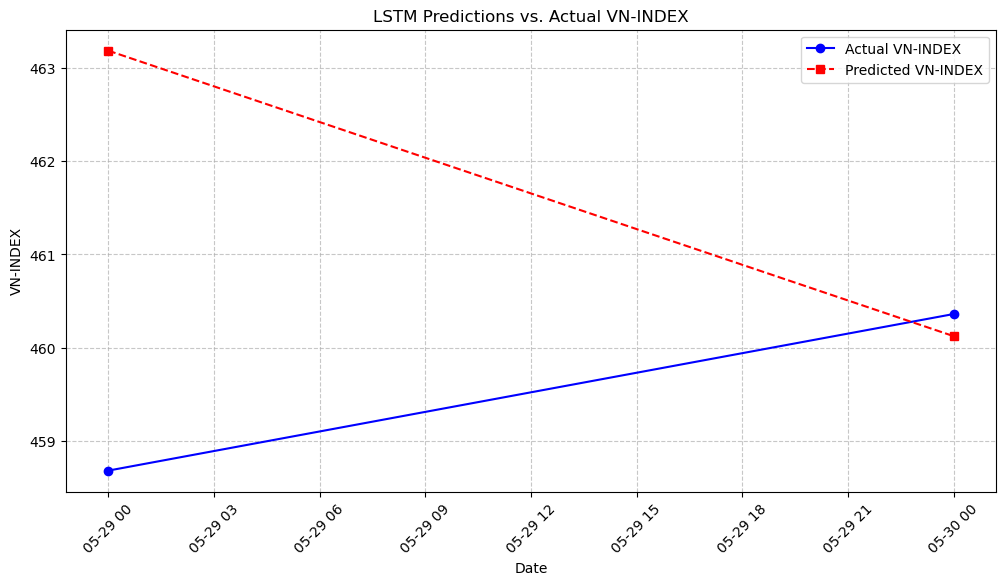

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-29       458.679993          463.185671
1 2025-05-30       460.359985          460.122667


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

9877    451.236312
9878    451.547277
dtype: float64
Hello
9877   -26.024185
9878   -16.779070
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

9877    461.479108
9878    461.745579
dtype: float64
[DatetimeIndex(['2025-05-13', '2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14', '2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15', '2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16', '2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-28 00:00

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5794 - Val Loss: 0.2156
Test Loss: 0.5301
9877    450.275429
9878    439.723658
dtype: float64
Date
2025-05-27    460.690003
2025-05-28    457.359984
dtype: float64
(2,)
2 2 2
RMSE: 14.4828, MAE: 14.0255, R²: -74.6610, Directional Accuracy: 1.0000


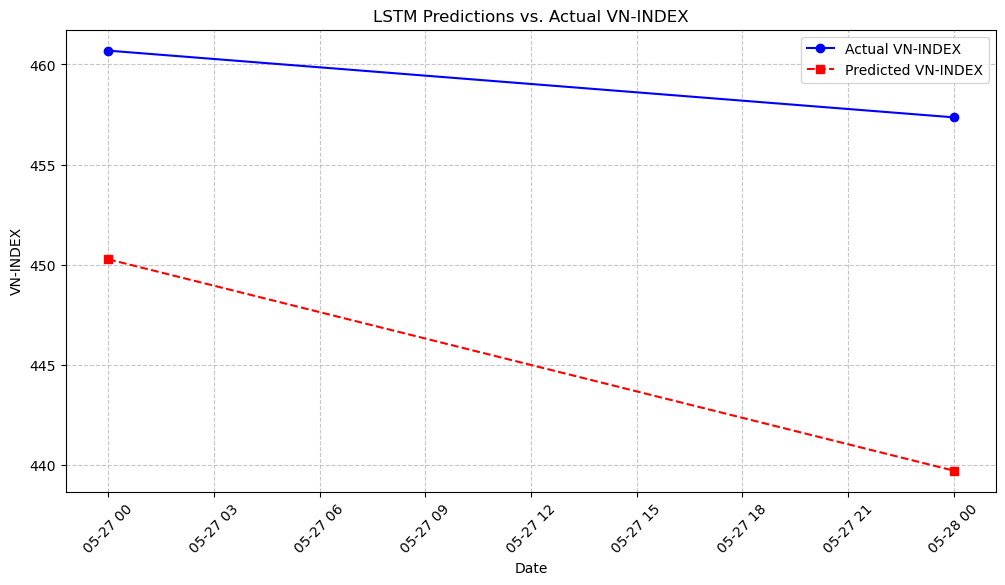

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-27       460.690003          450.275429
1 2025-05-28       457.359984          439.723658


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

9875    453.555732
9876    452.920994
dtype: float64
Hello
9875    -9.929536
9876    17.236701
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

9875    460.946177
9876    461.212668
dtype: float64
[DatetimeIndex(['2025-05-09', '2025-05-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-12', '2025-05-13'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-13', '2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14', '2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15', '2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16', '2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-23 00:00

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.7108 - Val Loss: 3.0192
Test Loss: 1.4614
9875    464.125569
9876    481.565649
dtype: float64
Date
2025-05-22    454.859985
2025-05-23    450.179994
dtype: float64
(2,)
2 2 2
RMSE: 23.1399, MAE: 20.3256, R²: -96.7897, Directional Accuracy: 0.0000


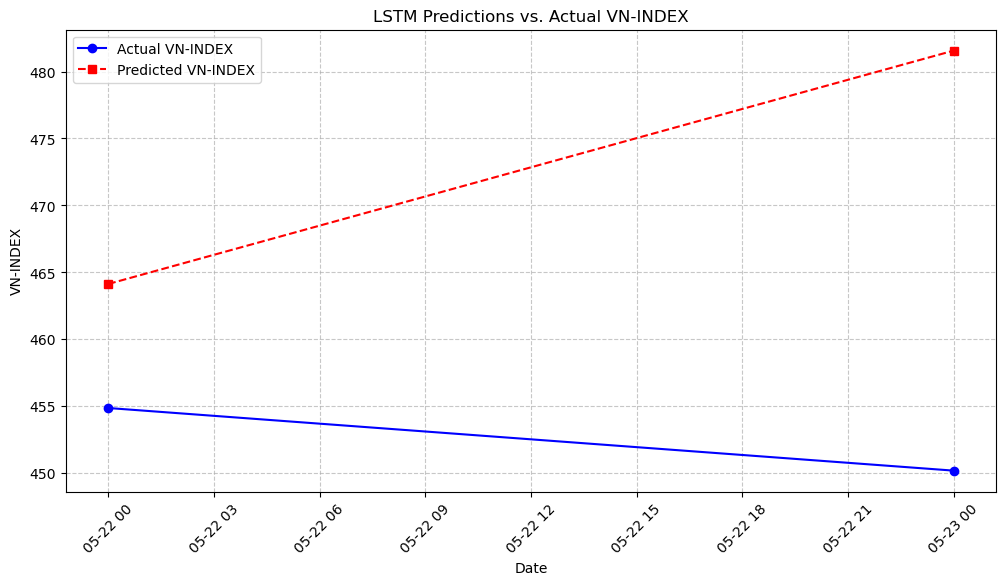

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-22       454.859985          464.125569
1 2025-05-23       450.179994          481.565649


In [8]:
for n_forecast in range(1,3):
    for i in range(5):
        baseline = ExponentialSmoothing(
        df_1['MCS_Close'].iloc[:-n_forecast*(i+1)],
        trend='add',            # additive trend
        seasonal='add',         # additive seasonality
        seasonal_periods=seasonal_periods
        ).fit()

        # 2) Forecast the next day (one‐step ahead):
        price_forecast = baseline.forecast(n_forecast)

        # 3) If you want to extract the trend/seasonal forecasts separately:
        fitted_components = baseline.fittedvalues  # this is price = level+trend+seasonal
        level = baseline.level                     # the “smoothed level” ≈ trend
        seasonal = baseline.season                 # the seasonal factors

        print(price_forecast)

        data = df_1[['residual', 'trend', 'seasonal', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']]

        if i:
            data = data.iloc[:-n_forecast*i]
        # 🚀 Train the model and get the test set
        model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False, train_seq_len=n_lags, test_seq_len=n_forecast, seasonal_periods=seasonal_periods, epochs=50)

Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5686    14.140838
5687     9.654690
dtype: float64
5686    1324.863802
5687    1325.273400
dtype: float64
[DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04', '2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05', '2025-06-06'], dtype='datet

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5530 - Val Loss: 0.0000
Test Loss: 0.1001
5686    1334.565118
5687    1330.683648
dtype: float64
Date
2025-06-05    1342.089999
2025-06-06    1330.169999
dtype: float64
(2,)
2 2 2
RMSE: 5.3333, MAE: 4.0193, R²: 0.1993, Directional Accuracy: 1.0000


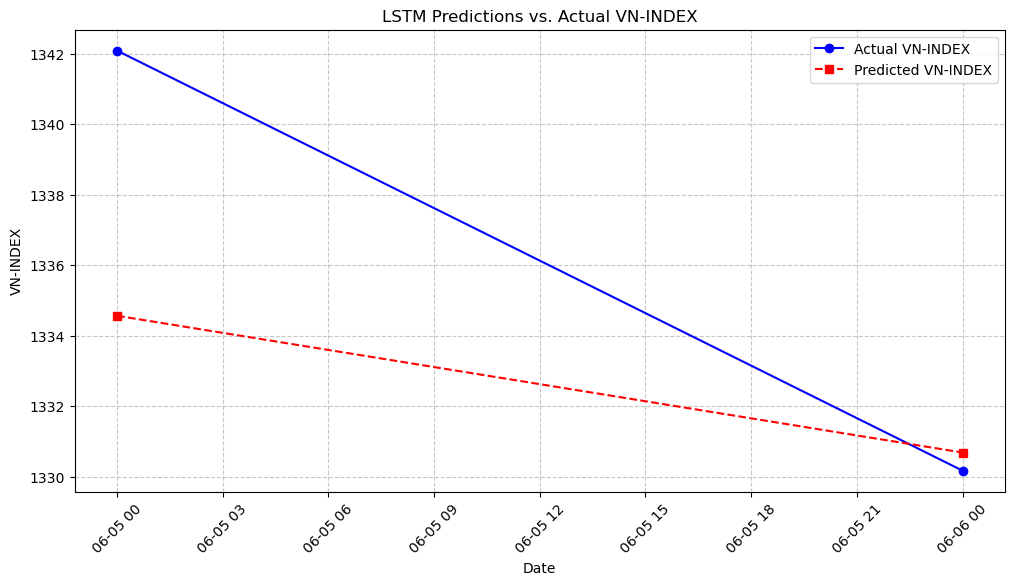

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-05      1342.089999         1334.565118
1 2025-06-06      1330.169999         1330.683648
torch.Size([1, 2, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


5688    1325.683060
5689    1326.092683
dtype: float64
5688    1339.555100
5689    1339.623194
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

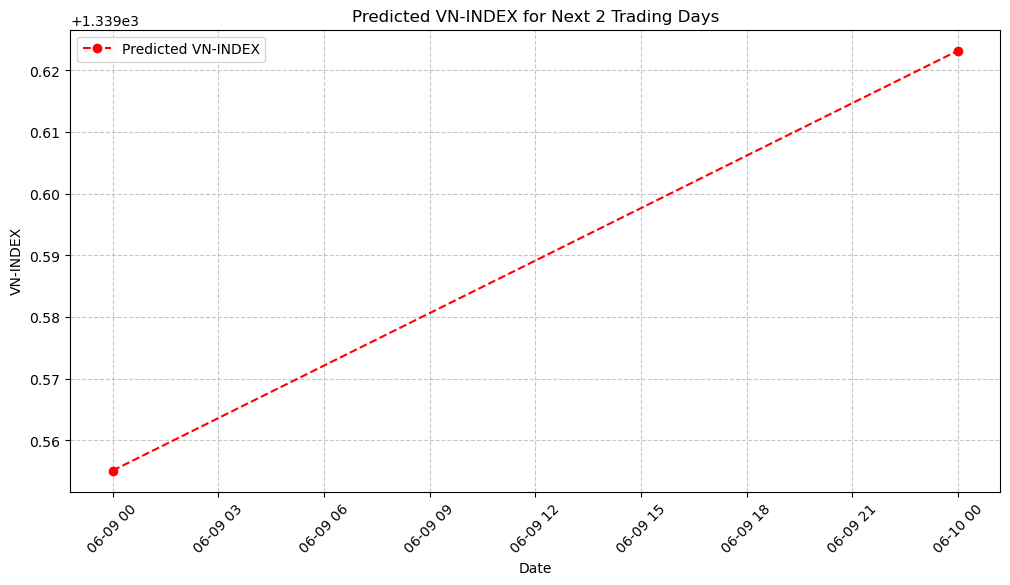

Date
2025-06-05    1342.09
2025-06-06    1330.17
dtype: float64


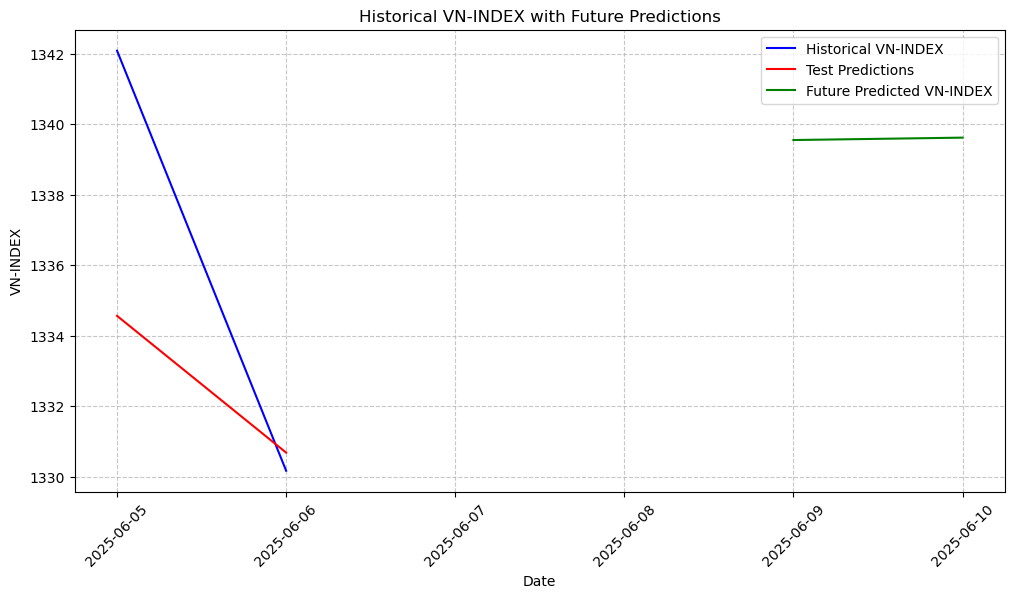

           Date  Predicted VN-INDEX
5688 2025-06-09         1339.555100
5689 2025-06-10         1339.623194


In [9]:
data = df_1[['residual', 'trend', 'seasonal', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']]
# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False, train_seq_len=n_lags, test_seq_len=n_forecast, seasonal_periods=seasonal_periods, epochs=50)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast, seasonal_periods=seasonal_periods)

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = df_1

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)